In [21]:
import nibabel as nib
from nilearn import plotting
import nilearn
import numpy as np
from nilearn.image import mean_img, index_img
from nilearn.glm import first_level, threshold_stats_img
from nilearn import plotting, datasets
from nilearn.image import new_img_like
from nilearn.maskers import NiftiLabelsMasker , NiftiMasker
import pandas as pd
import numpy as np
import seaborn as sns

## Loading Data and Atlas

In [19]:
anat = nib.load('sub-08_anat_sub-08_T1w.nii')
func = nib.load('swarsub-08_task-flanker_run-1_bold.nii')
events = pd.read_table('sub-08_func_sub-08_task-flanker_run-1_events.tsv')

In [28]:
HOA = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

<b> Note 1 <b>

for high resoultion T1: Atlas 1mm

low resolution T2: Atlas 2mm


<b> Note 2: Attributes <b>

.labels : gives us regions

.maps: Nifti-like file where we have atlases

.filename: where the file located, with what format

.plot_anat: generally plot the devisions

.plot_roi: showing the ROI based atlas: better visualization

In [32]:
HOA.filename

'C:\\Users\\ASUS/nilearn_data\\fsl\\data\\atlases\\HarvardOxford\\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz'

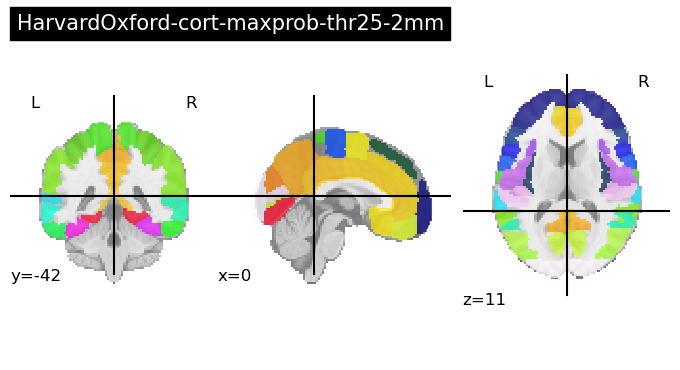

In [36]:
plotting.plot_roi(HOA.maps, title = 'HarvardOxford-cort-maxprob-thr25-2mm')

## Extracting time series based on Atlas

In [44]:
#plotting.plot_anat(mean_img(func))

NiftiLabelsMasker(): gives us information about each region

generate_report(): summary for regions

fit.transform(): fit your fMRI time series to all regions

region_names_: gives us the id of each region

In [47]:
Mask_definition = NiftiLabelsMasker(labels_img = HOA.filename, labels= HOA.labels)

In [68]:
#Mask_definition.fit()

In [66]:
#Mask_definition.generate_report()

In [62]:
time = Mask_definition.fit_transform(func)

In [64]:
time.shape

(146, 48)

In [70]:
time

array([[551.30999545, 818.56898761, 602.82204724, ..., 729.28466387,
        731.1954023 , 516.9247536 ],
       [551.02636877, 816.52584366, 601.62814961, ..., 727.44747899,
        728.24521073, 515.21493556],
       [550.34305384, 815.17385733, 600.00216535, ..., 726.18382353,
        725.00766284, 516.578279  ],
       ...,
       [539.1536663 , 803.90260572, 590.82814961, ..., 716.24369748,
        714.96551724, 503.8343442 ],
       [538.59212834, 804.81161897, 589.95374016, ..., 720.76260504,
        716.29501916, 504.16925701],
       [539.24193025, 807.12857753, 594.40944882, ..., 723.        ,
        718.72413793, 503.34874905]])

In [72]:
regions = Mask_definition.region_names_

In [74]:
regions

{0: 'Frontal Pole',
 1: 'Insular Cortex',
 2: 'Superior Frontal Gyrus',
 3: 'Middle Frontal Gyrus',
 4: 'Inferior Frontal Gyrus, pars triangularis',
 5: 'Inferior Frontal Gyrus, pars opercularis',
 6: 'Precentral Gyrus',
 7: 'Temporal Pole',
 8: 'Superior Temporal Gyrus, anterior division',
 9: 'Superior Temporal Gyrus, posterior division',
 10: 'Middle Temporal Gyrus, anterior division',
 11: 'Middle Temporal Gyrus, posterior division',
 12: 'Middle Temporal Gyrus, temporooccipital part',
 13: 'Inferior Temporal Gyrus, anterior division',
 14: 'Inferior Temporal Gyrus, posterior division',
 15: 'Inferior Temporal Gyrus, temporooccipital part',
 16: 'Postcentral Gyrus',
 17: 'Superior Parietal Lobule',
 18: 'Supramarginal Gyrus, anterior division',
 19: 'Supramarginal Gyrus, posterior division',
 20: 'Angular Gyrus',
 21: 'Lateral Occipital Cortex, superior division',
 22: 'Lateral Occipital Cortex, inferior division',
 23: 'Intracalcarine Cortex',
 24: 'Frontal Medial Cortex',
 25: 'J

In [80]:
df_series = pd.DataFrame(time, columns = regions.values())
df_series

,Frontal Pole,Insular Cortex,Superior Frontal Gyrus,Middle Frontal Gyrus,"Inferior Frontal Gyrus, pars triangularis","Inferior Frontal Gyrus, pars opercularis",Precentral Gyrus,Temporal Pole,"Superior Temporal Gyrus, anterior division","Superior Temporal Gyrus, posterior division",...,Temporal Occipital Fusiform Cortex,Occipital Fusiform Gyrus,Frontal Opercular Cortex,Central Opercular Cortex,Parietal Opercular Cortex,Planum Polare,Heschl's Gyrus (includes H1 and H2),Planum Temporale,Supracalcarine Cortex,Occipital Pole
0,551.309995,818.568988,602.822047,610.373589,676.824116,700.150289,652.293596,460.496285,629.523992,634.181421,...,687.628319,609.730343,747.448326,754.313362,763.893655,773.765020,792.187086,729.284664,731.195402,516.924754
1,551.026369,816.525844,601.628150,608.857035,675.680870,698.808526,651.552665,458.836340,629.042226,633.063388,...,687.163376,609.580842,746.902475,753.300636,763.220733,769.676903,788.976821,727.447479,728.245211,515.214936
2,550.343054,815.173857,600.002165,607.263732,674.359927,696.799133,650.755745,456.190830,626.278311,632.213115,...,686.404357,610.614064,745.749636,751.727466,762.418231,766.381842,786.781457,726.183824,725.007663,516.578279
3,549.186075,811.794105,598.411220,607.880361,670.225748,695.160405,650.419806,456.171089,626.099808,630.737705,...,683.497617,608.416944,743.508006,749.872747,758.728329,762.771696,781.551325,720.341387,718.065134,516.554018
4,547.455868,808.611704,596.179331,606.709368,668.900272,693.205202,647.782340,455.184037,624.978887,629.425683,...,680.646018,607.160022,740.106259,745.820255,753.754245,760.570093,778.211921,716.301471,712.137931,516.288476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,535.353381,800.724050,588.331102,597.172874,657.223028,682.446532,639.138341,446.729569,617.612284,624.218579,...,668.411845,592.843854,731.876274,737.619830,744.949955,750.201602,767.649007,705.938025,713.191571,498.146513
142,538.151913,802.409227,590.272441,599.049097,660.983681,685.661850,642.683075,448.449374,618.429942,626.504918,...,670.794418,594.336102,731.119360,740.790032,748.475424,752.291055,772.950331,710.748950,716.291188,500.305534
143,539.153666,803.902606,590.828150,599.869451,661.961015,686.645231,645.399160,450.108045,621.172745,628.585246,...,672.522124,597.605759,731.486172,744.977731,753.345845,756.871829,777.751656,716.243697,714.965517,503.834344
144,538.592128,804.811619,589.953740,599.981001,662.245694,688.193642,646.809868,449.853959,625.310940,631.604372,...,670.961198,598.340532,731.634643,746.384942,753.896336,759.941255,782.703642,720.762605,716.295019,504.169257


<Axes: >

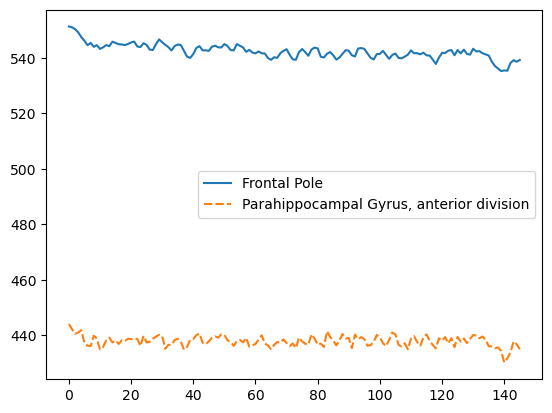

In [87]:
sns.lineplot(df_series[['Frontal Pole', 'Parahippocampal Gyrus, anterior division']])

## Extract time series based on Event

In [193]:
#events

In [189]:
TR = 2
df_series['time'] = range(0, len(df_series) * TR, TR)  
def map_event_to_time(row, events):
    # Find the event that occurs at the given time
    for _, event in events.iterrows():
        if event['onset'] <= row['time'] < event['onset'] + event['duration']:
            return event['trial_type']  # or any other column you want to map

    return 'rest'  # If no event happens at this time

# Apply the function to map the events
df_series['event'] = df_series.apply(lambda row: map_event_to_time(row, events), axis=1)


In [185]:
np.where(df_series['event'] == 'incongruent_correct')

(array([  0,   5,  10,  26,  44,  65,  72,  87, 124, 130, 137], dtype=int64),)

In [187]:
np.where(df_series['event'] == 'congruent_correct')

(array([ 16,  21,  32,  38,  51,  58,  77,  82,  92,  98, 104, 111],
       dtype=int64),)

In [195]:
df_series

,Frontal Pole,Insular Cortex,Superior Frontal Gyrus,Middle Frontal Gyrus,"Inferior Frontal Gyrus, pars triangularis","Inferior Frontal Gyrus, pars opercularis",Precentral Gyrus,Temporal Pole,"Superior Temporal Gyrus, anterior division","Superior Temporal Gyrus, posterior division",...,Frontal Opercular Cortex,Central Opercular Cortex,Parietal Opercular Cortex,Planum Polare,Heschl's Gyrus (includes H1 and H2),Planum Temporale,Supracalcarine Cortex,Occipital Pole,time,event
0,551.309995,818.568988,602.822047,610.373589,676.824116,700.150289,652.293596,460.496285,629.523992,634.181421,...,747.448326,754.313362,763.893655,773.765020,792.187086,729.284664,731.195402,516.924754,0,incongruent_correct
1,551.026369,816.525844,601.628150,608.857035,675.680870,698.808526,651.552665,458.836340,629.042226,633.063388,...,746.902475,753.300636,763.220733,769.676903,788.976821,727.447479,728.245211,515.214936,2,rest
2,550.343054,815.173857,600.002165,607.263732,674.359927,696.799133,650.755745,456.190830,626.278311,632.213115,...,745.749636,751.727466,762.418231,766.381842,786.781457,726.183824,725.007663,516.578279,4,rest
3,549.186075,811.794105,598.411220,607.880361,670.225748,695.160405,650.419806,456.171089,626.099808,630.737705,...,743.508006,749.872747,758.728329,762.771696,781.551325,720.341387,718.065134,516.554018,6,rest
4,547.455868,808.611704,596.179331,606.709368,668.900272,693.205202,647.782340,455.184037,624.978887,629.425683,...,740.106259,745.820255,753.754245,760.570093,778.211921,716.301471,712.137931,516.288476,8,rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,535.353381,800.724050,588.331102,597.172874,657.223028,682.446532,639.138341,446.729569,617.612284,624.218579,...,731.876274,737.619830,744.949955,750.201602,767.649007,705.938025,713.191571,498.146513,282,rest
142,538.151913,802.409227,590.272441,599.049097,660.983681,685.661850,642.683075,448.449374,618.429942,626.504918,...,731.119360,740.790032,748.475424,752.291055,772.950331,710.748950,716.291188,500.305534,284,rest
143,539.153666,803.902606,590.828150,599.869451,661.961015,686.645231,645.399160,450.108045,621.172745,628.585246,...,731.486172,744.977731,753.345845,756.871829,777.751656,716.243697,714.965517,503.834344,286,rest
144,538.592128,804.811619,589.953740,599.981001,662.245694,688.193642,646.809868,449.853959,625.310940,631.604372,...,731.634643,746.384942,753.896336,759.941255,782.703642,720.762605,716.295019,504.169257,288,rest


In [197]:
# Melt the fMRI data to get a long-form DataFrame suitable for seaborn plotting
df_long = df_series.melt(id_vars=['time', 'event'], 
                         var_name='region', 
                         value_name='signal')

In [199]:
df_long

,time,event,region,signal
0,0,incongruent_correct,Frontal Pole,551.309995
1,2,rest,Frontal Pole,551.026369
2,4,rest,Frontal Pole,550.343054
3,6,rest,Frontal Pole,549.186075
4,8,rest,Frontal Pole,547.455868
...,...,...,...,...
7003,282,rest,Occipital Pole,498.146513
7004,284,rest,Occipital Pole,500.305534
7005,286,rest,Occipital Pole,503.834344
7006,288,rest,Occipital Pole,504.169257


In [217]:
# List of regions you're interested in
regions_of_interest = ['Insular Cortex']
event_of_interest = ['congruent_correct', 'incongruent_correct']
# Filter the DataFrame to include only these regions
df_filtered = df_long[df_long['region'].isin(regions_of_interest)]
data_of_interest = df_filtered[df_filtered['event'].isin(event_of_interest)]

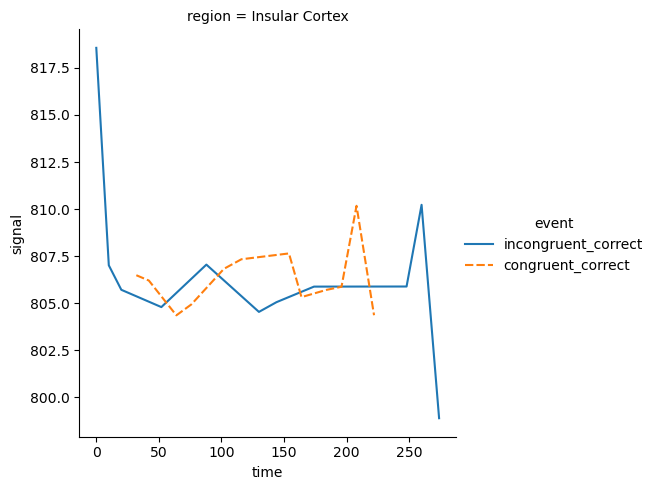

In [219]:
sns.relplot(
    data=data_of_interest,
    x='time', y='signal',
    col='region', hue='event', style='event',
    kind='line'
)

## Adding manual ROI

In [126]:
postcentral = nib.load('postcentral.nii')

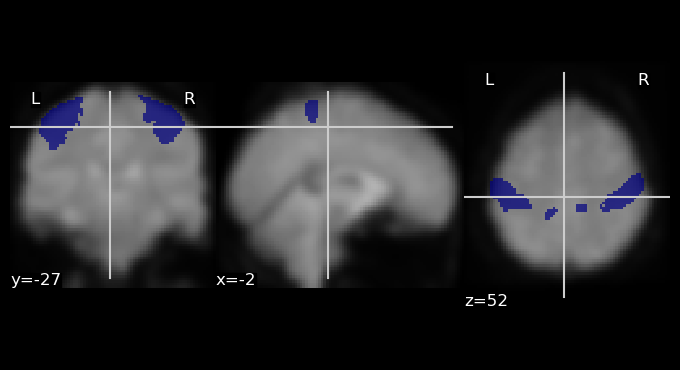

In [128]:
plotting.plot_roi(postcentral, bg_img = mean_img(func))

In [130]:
masker2 = NiftiMasker(mask_img = postcentral , target_affine = func.affine)
post_tims = masker2.fit_transform(func)

C:\Users\ASUS\anaconda3\lib\site-packages\nilearn\maskers\nifti_masker.py:110: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\joblib\memory.py:312: UserWarning: Casting data from int16 to float32
  return self.func(*args, **kwargs)


In [134]:
post_tims.shape

(146, 6895)

In [140]:
post_tims #time series of each voxel in that region

array([[12., 12., 13., ..., 60., 47., 50.],
       [12., 13., 14., ..., 56., 48., 51.],
       [10., 11., 11., ..., 58., 46., 48.],
       ...,
       [12., 12., 12., ..., 56., 47., 49.],
       [11., 11., 11., ..., 59., 48., 50.],
       [14., 14., 13., ..., 59., 47., 50.]], dtype=float32)

## Extracting mask from Nilearn

1. find the index of region (from HOA.label for example)
2. use get_fdata for extracting mask
3. use new_img_like to create new nifti file

In [143]:
region_index = HOA.labels.index('Postcentral Gyrus') #first stage find index
region_mask = (HOA.maps.get_fdata() == region_index) #data of that specific atlas
region_img = new_img_like(HOA.maps, region_mask) #new nifti file

In [145]:
region_img

In [151]:
#nib.save(region_img, 'ourmask.nii') #for saving that file

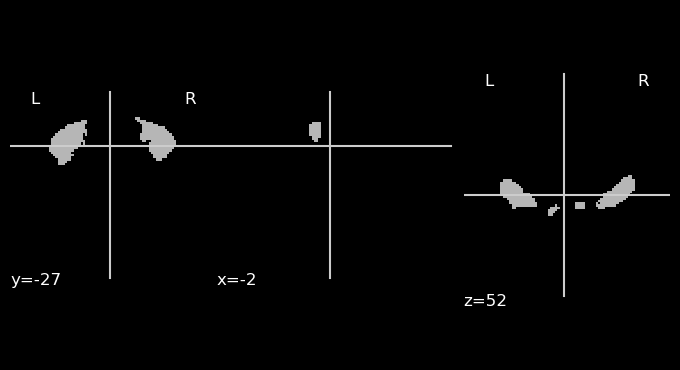

In [153]:
plotting.plot_anat(region_img)

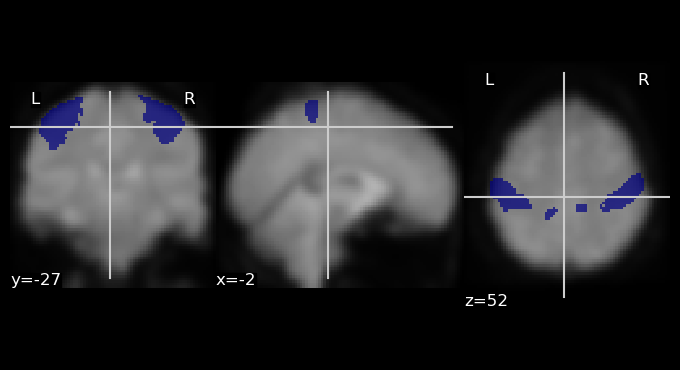

In [155]:
plotting.plot_roi(region_img, bg_img = mean_img(func))

## Extracting time series based on Location

when we want to extract the time series based on the location, we could simply use a inverse_transform function

In [159]:
loc_based = masker2.inverse_transform(post_tims)

In [161]:
loc_based

In [165]:
# post_tims == time series
# marker 2 == nifti file of that ROI

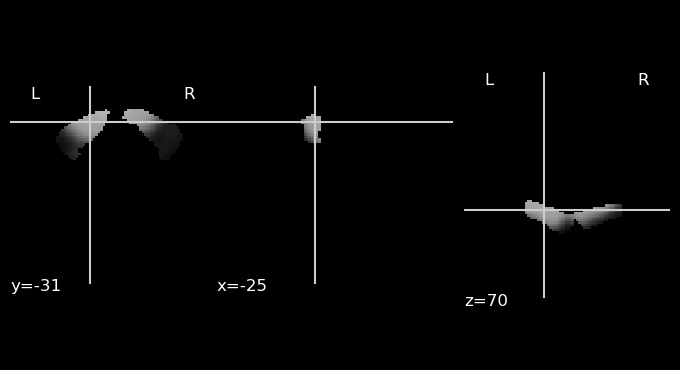

In [167]:
plotting.plot_anat(mean_img(loc_based))